## <span style="color:blue"> Computer Vision - Winter 2024

## <span style="color:blue"> Exercise 3 </span>
**Reichman University**

**Lecturer:** Prof. Yael Moses, RUNI

**TA:** Eyal Friedman, RUNI

    
    
**Submission date: 9.2.24** \
Note: In case you need an extension for any reason, you can submit it by 14.2.24. \
No extra extensions will be given.
In case you are in miluim - please contact Yael directly.

**Your name: Tom Sabag, Gal Moshkovitch**
**Your ID: 208845842, 315848929**

In this exercise, you will practice projection matrices and epipolar geometry related tasks.



## <span style="color:blue"> Submission guidelines:</span>

1. Your **zip** file should include the following files only:
   - ex3.ipynb
   - images you use that were not given
2. You should use Jupyter Notebook.
3. Name the zip file **'ex3_ID_ID.zip'** and **do not** include any additional directories.
4. Submit using *Moodle*.
5. Submit on time!
6. You can submit this assignment in pairs (no triplets).
   * In the case of pair submission, both IDs and names should be added to the notebook.
   * One should submit the homework, and the other should submit a simple text file named: ID_ID.txt and nothing else.
   *Please make sure that your collaborator submits the HW.

## Read the following instructions carefully:

1. Write **efficient vectorized** code.
2. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests unless requested.
3. Use `Python 3` and `numpy 1.18.5` or above. Changes to the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden unless provided by us.
5. Your code must run without errors. Note, **Code that fails to run will not be graded.**
6. Document your code properly.
7. Go over Warmup Python - you can find relevant python functions that will make your life easier.



In [3]:
import cv2

# This opens an inteactive figure - use it in part B
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import null_space

# This specifies the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'


In [3]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.9.18
Numpy version:  1.26.3


## <span style="color:blue">Section A: Projection

In this part you will go over projection matrix,  and use them to project 3D points to an image.



## <span style="color:blue">Part A1: Projection Matrix
Fill the missing values, given partial values of the parameters of the left and right cameras.




**Right image parameters:**
The projection matrix of the right image:

In [9]:
MR = np.array([[1100.504780,          0,   331.023000,   0],
               [0,          1097.763735,   259.386377,   0],
               [0,                    0,            1,   0]])

The rotation matrix of the right image:

In [10]:
RR = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])

The focal length of the right image:

In [11]:
fR = 1.0

From here on, replace "none" with your answers to the questions. In addition, if there are more than a single possible solution, choose one.
Compute the right image center (principal point):


In [12]:
OxR = 331.023000
OyR = 259.386377

Compute the right image scale factor which is consistent with MR:

In [13]:
SxR = 1100.504780
SyR = 1097.763735

Compute the right image intrinsic matrix which is consistent with MR:

In [14]:
MintR = np.array([[1100.504780,          0,   331.023000,   0],
                  [0,          1097.763735,   259.386377,   0],
                  [0,                    0,            1,   0]])


**Left image parameters**

Left image center (principal point):

In [15]:
OxL = 320.798101
OyL = 236.431326

Scale factor:

In [16]:
SxL = 1095.671499
SyL = 1094.559584

Focal length of the left image:

In [17]:
fL = 1

Translation vector w.r.t. the world origin:

In [18]:
TL = -np.array([[178.2218,18.8171,-13.7744]]).T

Rotation matrix of the left image:

In [19]:
RL = np.array([[ 0.9891,    0.0602,   -0.1346],
               [-0.0590,    0.9982,    0.0134],
               [0.1351,   -0.0053,    0.9908]])

Compute the intrinsic projection matrix of the left camera:

In [20]:
MintL = np.array([[fL * SxL, 0,        OxL, 0],
                  [0,        fL * SyL, OyL, 0],
                  [0,        0,         1,  0]])
print(MintL)

[[1095.6714990 0.0000000 320.7981010 0.0000000]
 [0.0000000 1094.5595840 236.4313260 0.0000000]
 [0.0000000 0.0000000 1.0000000 0.0000000]]


Compute the projection matrix of the left camera

In [21]:
MextL = np.hstack((RL, -RL@TL))
last_row = np.array([0,0,0,1])
MextL = np.vstack((MextL, last_row))
print(MextL)

[[0.9891000 0.0602000 -0.1346000 179.2660060]
 [-0.0590000 0.9982000 0.0134000 8.0835661]
 [0.1351000 -0.0053000 0.9908000 10.3303590]
 [0.0000000 0.0000000 0.0000000 1.0000000]]


In [22]:
ML = MintL @ MextL
print(ML)

[[1127.0685031 64.2591943 170.3693747 199730.6131171]
 [-32.6371433 1091.3362907 248.9232562 11290.3651874]
 [0.1351000 -0.0053000 0.9908000 10.3303590]]


Compute the COP of the left and the right images, in Cartesian coordinates:   

(You may use the the function *null_space* from *scipy.linalg*)

In [23]:
CL = null_space(ML)
CL = CL[:-1] / CL[-1] # Convert to cartesian coordinates

CR = null_space(MR)
CR = CR[:-1] / CR[-1] # Convert to cartesian coordinates

In [24]:
print("CL:", CL.T)
print("CR:", CR.T)

CL: [[-178.2218000 -18.8171000 13.7744000]]
CR: [[0.0000000 0.0000000 0.0000000]]


Compute the distance between CL and CR:
    

In [25]:
D = np.linalg.norm(CL-CR)
print(D)

179.74100072884946


## <span style="color:blue">Part A2: Hands on Triangulation

Write a function p = proj(M,P) that recieves as input the 3D point P in Euclidean coordinates and a projection matrix M, and outputs the 2D  Euclidean coordinates of the projected point.


In [26]:
# Your code for proj function
def proj(M, P):
    P_homogenous = np.append(P, 1)
    projection = M @ P_homogenous
    p = projection / projection[-1]
    return p[:-1]


**<span style="color:blue">Answer Quesion:**\
Given object points in the world coordinate system,  P=(-140,50,1200) and Q=(30,100,2000).

a.	What are the coordinates (Euclidean) of the points in the left camera coordinate system?\
b.	What are the coordinates (Euclidean) of the points in the right camera coordinate system?
    
Note: the camera coordinate system rather than the image coordinate system (PL means the 3D coordinates in the left **camera** cordinates system, and pL means the 2D coordinates in the left **image** coordinates system.
   

**<span style="color:blue">Answer:**
    
    
    

In [27]:
P = np.array([[-140],[50],[1200]])
pL = proj(ML,P)
pR = proj(MR,P)

Q = np.array([[30],[100],[2000]])
qL = proj(ML,Q)
qR = proj(MR,Q)

In [28]:
depth_points = [np.array([[30],[100],[1000 +  800*i]]) for i in range(10)]
depth_points_r = [proj(MR, point) for point in depth_points]
depth_points_l = [proj(ML, point) for point in depth_points]


In [29]:
print("pL:", pL)
print("pR:", pR)

print("qL:", qL)
print("qR:", qR)

pL: [211.5031180 312.7961480]
pR: [202.6307757 305.1265326]
qL: [291.0152394 309.3489455]
qR: [347.5305717 314.2745637]


In [30]:
PL = proj(MextL, P)
PR = proj(np.identity(4), P)
QL = proj(MextL, Q)
QR = proj(np.identity(4), Q)

In [31]:
print("PL:", PL)
print("PR:", PR)

print("QL:", QL)
print("QR:", QR)

PL: [-117.7179940 82.3335661 1180.1113590]
PR: [-140.0000000 50.0000000 1200.0000000]
QL: [-54.2409940 132.9335661 1995.4533590]
QR: [30.0000000 100.0000000 2000.0000000]


### Read two images and display the projections of P and Q on the two given images ###

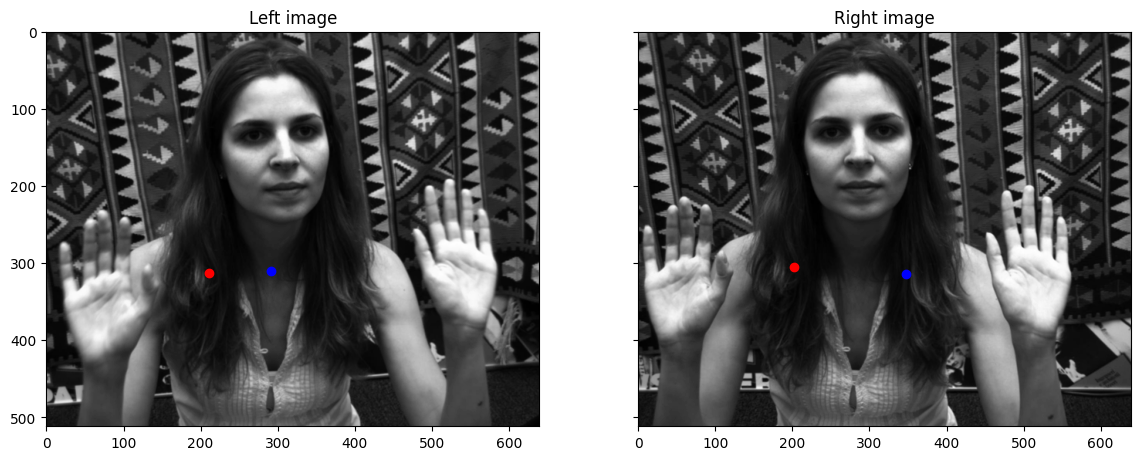

In [27]:
imL = cv2.imread('left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('right.tif', cv2.IMREAD_GRAYSCALE)

plt.rcParams['figure.figsize'] = (14.0, 14.0)
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image'), ax1.scatter(pL[0], pL[1], color='r'), \
    ax1.scatter(qL[0],qL[1], color = 'b')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image'), ax2.scatter(pR[0], pR[1], color = 'r'), \
    ax2.scatter(qR[0],qR[1], color = 'b')


plt.show()

**<span style="color:blue"> Answer Question:**\
Look at the projection of each of the points in the two images. One pair looks as expected, and the other does not. Please give a short explanation of what may have caused it.

**<span style="color:blue">Answer:**

  The red pair of points pL and pR look as expected, projected P to approximately the same location in both images.
  
  On the other hand, qL and qR are projecte to different locations in the right and left images.

  We believe that this is happening because Q is located deeper then P ($Z$ coordinate).
  
  MextR indicates no rotation or translation, leading to less noticeable perspective effects, causing projection points of diffrent depths to aproxamtly the same point on the image.
  
  However, MextL does has rotation and translation, leading to noticeable perspective effects, resulting in depth-related distortions. As a result objects appear closer or further according to their depth.

  We visualize this by projecting points of different depths in both images.
  
  It is very noticable that deeper points in the right image, with no rotation or translation, are shifting mostly in the y axis.

  On the other hand, points in the left image, suffer from perspective and depth related distortions, moving in the X axis as well

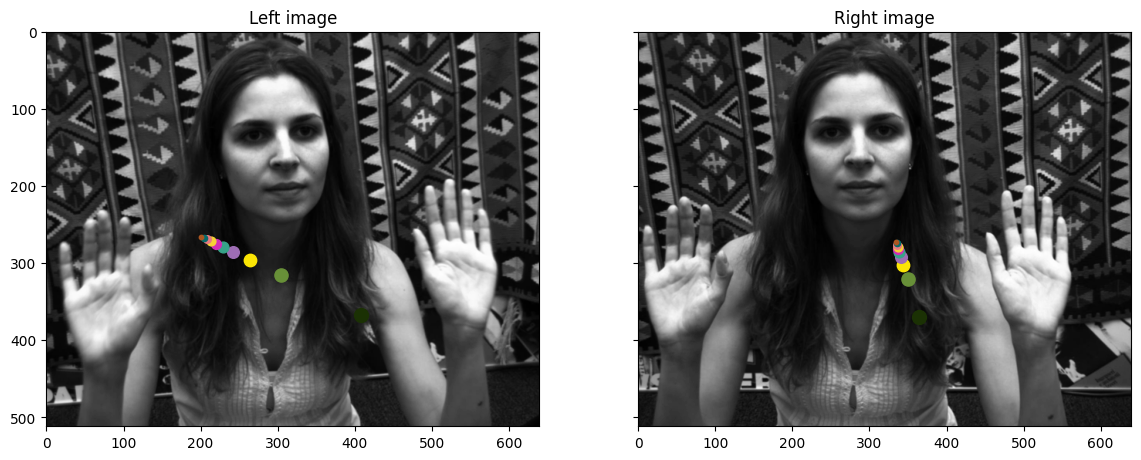

In [28]:
plt.rcParams['figure.figsize'] = (14.0, 14.0)
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

for i in range(10):
  random_color = np.random.rand(3)
  ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image'), ax1.scatter(depth_points_l[i][0], depth_points_l[i][1], color=random_color, s=100-10*i)
  ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image'), ax2.scatter(depth_points_r[i][0], depth_points_r[i][1], color=random_color, s=100-10*i)


## <span style="color:blue"> Part B: Epipolar Geometry
Compute the fundamental matrix F and the epipoles eL and eR of the left and right images, using their projection matrices.\
Note, you should normalize F by F(3,3) for improved precision.

For the epipoles' computation use the MR and ML and the Center of projections.

**<span style="color:blue">Answer Question:**
Can you double check if they are correct using F? If so, check it.


**<span style="color:blue">Your answer:**\
   ...
    
    
    

In [32]:
def get_skew_symmetric_matrix(v):
    return np.array([
        [0, -1, v[1]],
        [1, 0, -v[0]],
        [-v[1], v[0], 0]])

In [33]:
eL = proj(ML, CR)
eR = proj(MR, CL)

print("eL:", eL)
print("eR:", eR)

F = get_skew_symmetric_matrix(eR) @ MR @ np.linalg.pinv(ML)
print(F)

eL: [19334.3341250 1092.9305704]
eR: [-13907.9959627 -1240.2600670]
[[0.1237625 -1.0193870 -1278.7471447]
 [-0.7550110 0.1147394 14472.2329630]
 [784.8789074 -14035.3229720 164522.4987536]]


In [34]:
# zero outcome verifies that the epipolar constraint is satisfied
print(F @ np.append(eL,1))
print(np.append(eR.T,1) @ F)

[-0.0000000 0.0000000 -0.0000000]
[-0.0000000 -0.0000000 0.0000000]


## Epipolar lines ##

Click on three different points of the **right** image, and check if the epipolar lines on the left image pass through a pixel that corresponds to the one you picked in the right image. Output the set of epipolar lines overlayed on the pair of  images as shown below.

To do so you can use:
1. The code below opens the images in a seperate window. You can click on the right image and  capture the click's coordinates by using the function *plt.ginput*.
2. Take each point (this can be done by a loop) and calculate its epipolar line  on the left image using F.
3. Compute the two endpoints of the line in the image to plot it on the left image. \
    **Hint**: you have linear coefficients - (a,b,c). Calculate the y value in the image for x=0, and x=image.width and plot the result.\
    Use: ax2.plot((x0. xWidth),(yx0, yxWidth))
4. Use the set of the points of the right image that you collected, and draw the epipolar lines on the right image.

In [32]:
# This sould open a new figure window outside of jupyter notebook
%matplotlib qt

imL = cv2.imread('left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('right.tif', cv2.IMREAD_GRAYSCALE)

plt.rcParams['figure.figsize'] = (14.0, 14.0)
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')
ax2.imshow(imR, cmap='gray'), ax2.set_title('Right image')

data = plt.ginput(3)

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

ax2.scatter(x_val, y_val, color='r')

height, width = imL.shape
for x in data:
    x_homogenous = np.append(x, 1)
    line = x_homogenous @ F
    a, b, c = line
    p1 = (0, int(-c/b))
    p2 = (width, int((-c-width*a)/b))

    cv2.line(imL, p1, p2, (0, 0, 255), 2)
ax1.imshow(imL, cmap='gray'), ax1.set_title('Left image')


(<matplotlib.image.AxesImage at 0x134779070>, Text(0.5, 1.0, 'Left image'))

In [33]:
%matplotlib inline

### This is what you should see:
![Epipolar](epipolarLines1.png "Epipolar Lines example")

##  <span style="color:blue">Part C : SIFT and RANSAC/LMedS
**Follow the matching to compute F.**

https://docs.opencv.org/master/da/de9/tutorial_py_epipolar_geometry.html

The example attached here needs some twicks to make it work. First you need to uninstall the opencv package and to install to opencv-contrib package:
- pip uninstall opencv-python

Then install the contrib version with this:
- pip install opencv-contrib-python

**<span style="color:red"> Now, you have to use those lines:**
- **sift = cv2.xfeatures2d.SIFT_create()**
- **kp1, des1 = sift.detectAndCompute(img1, None)**


Hereby, we will find the corresponding featues using the SIFT algorithm and match the closet points. The plotted figure showes the best 300 matches.


In [ ]:
!pip uninstall opencv-python
!pip install opencv-contrib-python

[ WARN:0@67.993] global shadow_sift.hpp:15 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


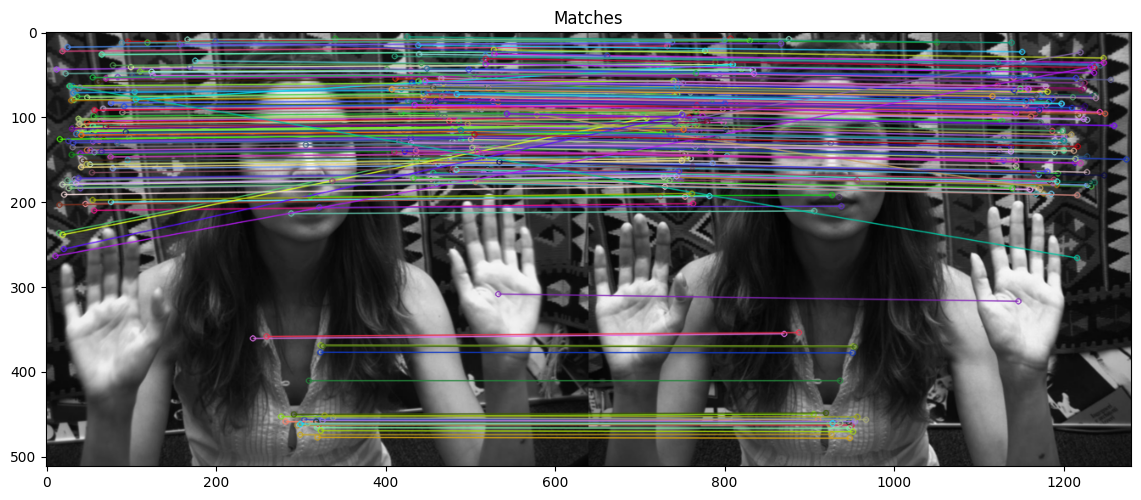

In [4]:
imL = cv2.imread('left.tif', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('right.tif', cv2.IMREAD_GRAYSCALE)

def draw_matching_by_sift(img1, img2, max_npoints = 300):
  # Initiate SIFT detector
  # In the link above you need to change the next line from cv.SIFT to cv2.xfeatures2d.
  # Instead of: sift = cv2.SIFT() use:
  sift = cv2.xfeatures2d.SIFT_create()

  # find the keypoints and descriptors with SIFT
  kp1, des1 = sift.detectAndCompute(img1,None)
  kp2, des2 = sift.detectAndCompute(img2,None)

  # FLANN parameters
  FLANN_INDEX_KDTREE = 1
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  search_params = dict(checks=50)
  # create FlannBasedMatcher object
  flann = cv2.FlannBasedMatcher(index_params,search_params)

  # Match descriptors.
  matches = flann.knnMatch(des1,des2,k=2)

  pts1 = []
  pts2 = []
  matching = []
  # Building a list of points screened by ratio test as per Lowe's paper
  for i,(m,n) in enumerate(matches):
      if m.distance < 0.8*n.distance:
          pts2.append(kp2[m.trainIdx].pt)
          pts1.append(kp1[m.queryIdx].pt)
          matching.append(m)


  # Sort them in the order of their distance.
  matching =  sorted(matching, key = lambda x:x.distance)

  # Draw first max_npoints matches.
  img3 = np.array([])
  img3 = cv2.drawMatches(img1, kp1, img2, kp2, matching[:max_npoints], outImg = img3, flags =2)

  plt.rcParams['figure.figsize'] = (14.0, 14.0)
  f, ((ax1)) = plt.subplots(1, 1, sharex='col', sharey='row')
  ax1.imshow(img3, cmap='gray'), ax1.set_title('Matches')

  return pts1, pts2

pts1, pts2 = draw_matching_by_sift(imL, imR)

<span style="color:blue"> Not for submission:

    Look at the obtain results.

    a. Do you think all matches are correct?
    b. In which regions of the scene, most of the reliable matches were found?
    c. Try the worst 200 mathces as well -- matching[-1-200:]

Now, we will use the found matches to compute **F** using *cv2.findFundamentalMat()*.

In [5]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

# Computing the F matrix
F_calc, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [35]:
np.set_printoptions(formatter={'float' : '{:0.7f}'.format})
print(F_calc.T)
print(F)

[[0.0000014 -0.0000217 0.0060675]
 [0.0000161 0.0000038 -0.0578870]
 [-0.0084220 0.0569918 1.0000000]]
[[0.1237625 -1.0193870 -1278.7471447]
 [-0.7550110 0.1147394 14472.2329630]
 [784.8789074 -14035.3229720 164522.4987536]]


And now lets check the computed F_calc:
1. Use it to draw the epipolar line as in the example above (change F to F_calc.T)
2. Compute the distance between the computed epipoles by F and by F_calc in each of the images.

Hint: You can use scipy.linalg import null_space

In [36]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

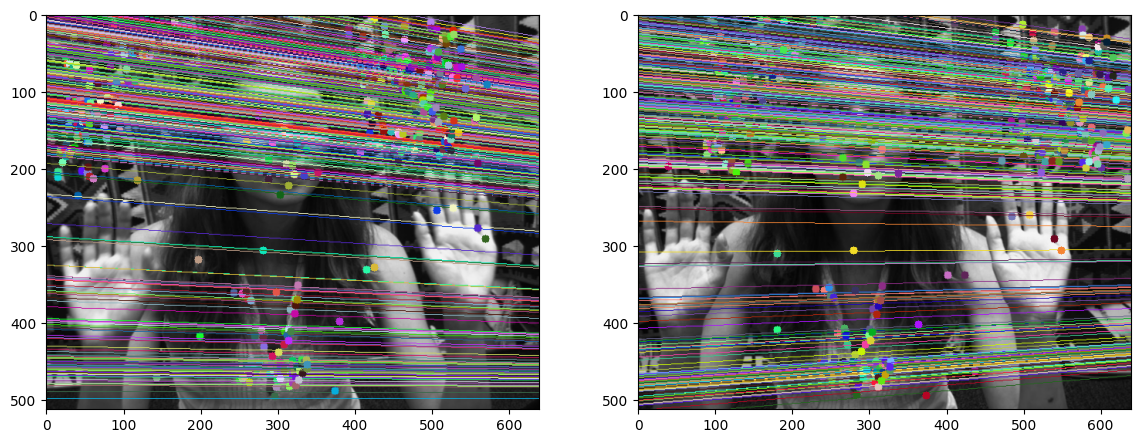

In [37]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F_calc.T)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(imL,imR,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F_calc.T)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(imR,imL,lines2,pts2,pts1)
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

In [38]:
def find_epipoles(F):
  e_left = null_space(F)
  e_right = null_space(F.T)
  e_right = e_right / e_right[2]
  e_left = e_left / e_left[2]
  return e_right[:-1], e_left[:-1]

F_e_right, F_e_left = find_epipoles(F)
Fcalc_e_right, Fcalc_e_left = find_epipoles(F_calc.T)
print(f"Right epipoles: F: {F_e_right.T}, F_calc: {Fcalc_e_right.T}")
print(f"Left epipoles: F: {F_e_left.T}, F_calc: {Fcalc_e_left.T}")
print(f"Distance: Right: {np.linalg.norm(F_e_right - Fcalc_e_right)}, Left; {np.linalg.norm(F_e_left - Fcalc_e_left)}")

Right epipoles: F: [[-13907.9959627 -1240.2600670]], F_calc: [[2674.8802998 297.6439338]]
Left epipoles: F: [[19334.3341250 1092.9305704]], F_calc: [[3470.6521442 495.3318367]]
Distance: Right: 16654.036563358717, Left; 15874.934022952144


**<span style="color:blue">Answer Question:**\
    Do you see any differences?
    
**<span style="color:blue">Your answer:**\
 Yes, F_calc, which was calculated using the corresponding points found by the SIFT algorithm, did not perform as well as the F.

 F was built using the actual parameters of the cameras and its actual fundamental matrix, whereas F_calc is an approximation.

### <span style="color:blue"> Your part in this section :) ###

#### Take two images by your camera and compute the epipolar geometry using LMedS ####

Please submit: 5 corresponding epipolar lines overlayed on   your pair of images.

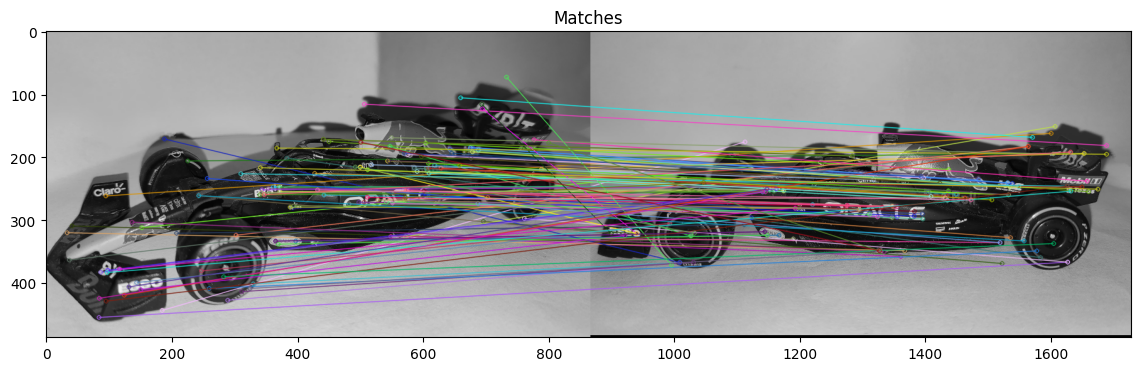

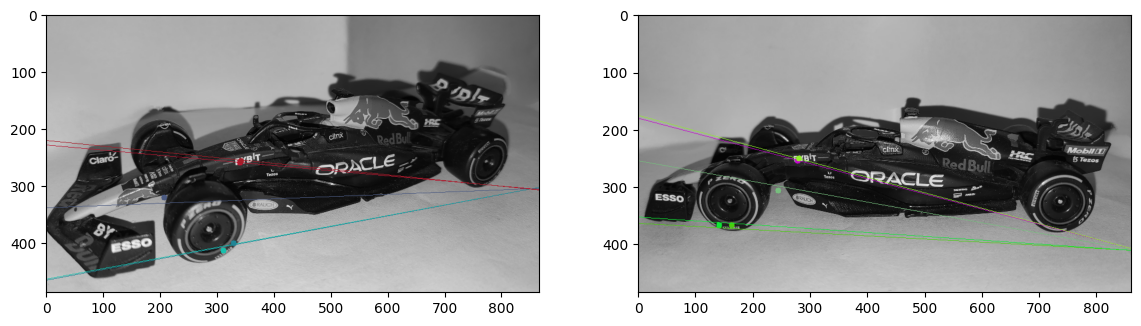

In [64]:
F1_left = cv2.imread('F1_left.jpeg', cv2.IMREAD_GRAYSCALE)
F1_right = cv2.imread('F1_right.jpeg', cv2.IMREAD_GRAYSCALE)

F1_left = cv2.resize(F1_left, (int(F1_left.shape[1]/4), int(F1_left.shape[0]/4)))
F1_right = cv2.resize(F1_right, (int(F1_right.shape[1]/4), int(F1_right.shape[0]/4)))

pts1, pts2 = draw_matching_by_sift(F1_left, F1_right)
pts1, pts2 = np.int32(pts1), np.int32(pts2)

F_calc, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)

pts1 = pts1[mask.ravel()==1][:5]
pts2 = pts2[mask.ravel()==1][:5]

lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F_calc)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(F1_left,F1_right,lines1,pts1,pts2)

lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F_calc)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(F1_right,F1_left,lines2,pts2,pts1)
plt.figure()
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

##  <span style="color:blue"> Part D: Answer the following question
    
Consider two rectified images that are related by translation along the $y$-axis.

1. What is the epipolar line on the bottom image for the point $(x, y)$ on the top image?
2. What is the Fundamental matrix of the pair of images? Explain your answer and prove that it is consistent with your answer to (1).
3. Where is the epipole of the top image? Prove your answer formally using your answer to (2).
    
    


**<span style="color:blue"> Answer:**

1.
From the rectified property we know that there is no scaling, rotation or other transformations that are involved, only translation along the y axis, $T=\begin{bmatrix}0&d&0\end{bmatrix}$.

Therefore, the epipolar line of any point in the left image is the same as the epipolar line of the right image:
$\tilde{p}_R^TF = F\tilde{p}_L$.

If $\tilde{p}_L = (x,y)$ then $\tilde{l}_R=x$.

2.
We have learned that $\tilde{p}_R^TF\tilde{p}_L = 0$.

Let $\tilde{p}_R = \begin{bmatrix}x'&y'&z\end{bmatrix}$and

$\tilde{p}_L = \begin{bmatrix}x&y&z\end{bmatrix}$and

$F=\begin{bmatrix}
0&0&d\\
0&0&0\\
-d&0&0\end{bmatrix}$ then

$\begin{bmatrix}
x' & y' & z
\end{bmatrix}\begin{bmatrix}
0 & 0 & d\\
0 & 0 & 0\\
 -d& 0 & 0
\end{bmatrix}\begin{bmatrix}
x\\
y\\
z
\end{bmatrix}=0\Leftrightarrow\begin{bmatrix}
x' & y' & z
\end{bmatrix}\begin{bmatrix}
dz\\
0\\
-dx
\end{bmatrix}=0\Leftrightarrow x=x'$

Which is consistent with the top answer of $\tilde{l}_R=x$.






3. We have learned that $F\tilde{e}_{Top}=0$. Therefore,

$\tilde{e}_{Top}∈kernel(F)\Leftrightarrow \begin{bmatrix}
0 & 0 & d\\
0 & 0 & 0\\
 -d& 0 & 0
\end{bmatrix}\begin{bmatrix}
x_{\tilde{e}_{Top}}\\
y_{\tilde{e}_{Top}}\\
z
\end{bmatrix}=0\Leftrightarrow \tilde{e}_{Top}=\begin{bmatrix}0
\\ t \\ 0 \end{bmatrix}$